In [1]:
import sys
sys.path.append('..')
import os 
os.environ['CUDA_VISIBLE_DEVICES'] = '0'

import networks
import torch
import mmcv
from mmcv.runner import load_checkpoint
from PIL import Image
from transforms import eval_transform
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import cv2 as cv
import numpy as np
import glob


root = '/home/jie.wang/data/CUB_200_2011/images/'
imagelist = sorted(glob.glob(root+'*/*.jpg'))

In [2]:
def read_image(path):
    img = Image.open(path).convert('RGB')
    img = img.resize((448,448))
    print(path)
    plt.figure()
    plt.axis('off')
    plt.imshow(np.array(img))
    input = eval_transform(img)
    return input[None], img

def denormalize(tensor):
    mean = [0.4914, 0.4822, 0.4465]
    std = [0.2023, 0.1994, 0.2010]
    dtype = tensor.dtype
    mean = torch.as_tensor(mean, dtype=dtype, device=tensor.device)
    std = torch.as_tensor(std, dtype=dtype, device=tensor.device)
    tensor.mul_(std[:, None, None]).add_(mean[:, None, None])
    return tensor

In [3]:
net = networks.s3n(num_classes=200).cuda()
checkpoint = load_checkpoint(net, '../out/s3n/latest.pth')
_ = net.eval()

/home/jie.wang/data/CUB_200_2011/images/006.Least_Auklet/Least_Auklet_0027_795091.jpg
tensor(5, device='cuda:0')


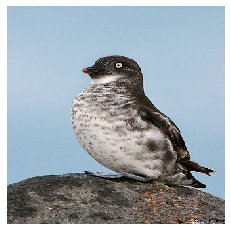

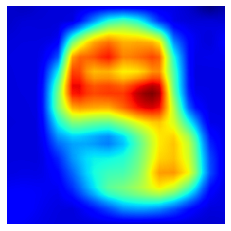

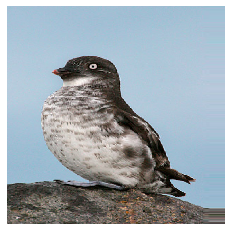

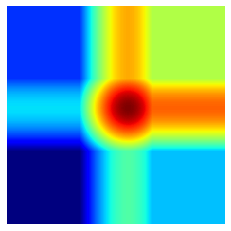

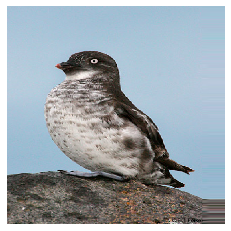

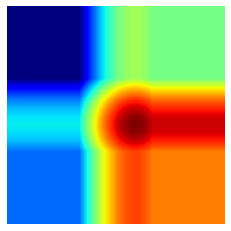

In [10]:
input, img = read_image(imagelist[300])
input = input.cuda()
output, agg_origin, agg_sampler, agg_sampler1 = net(input, 2)
print(torch.argmax(output))
img = np.array(img).transpose((2,0,1))[None]
img_tensor = torch.from_numpy(img).float().cuda()


decide_map = net.decide_map
decide_map = F.interpolate(decide_map, size=(448,448),mode='bilinear', align_corners=True)
decide_map = decide_map.squeeze().detach().cpu().numpy()
plt.figure()
plt.axis('off')
plt.imshow(decide_map, cmap='jet')

x_sampled_zoom = net.x_sampled_zoom.squeeze()
x_sampled_zoom = denormalize(x_sampled_zoom)
x_sampled_zoom = x_sampled_zoom.detach().cpu().numpy().transpose((1,2,0))
x_sampled_zoom = np.uint8(np.clip(x_sampled_zoom * 255, 0, 255))
plt.figure()
plt.axis('off')
plt.imshow(x_sampled_zoom)

xs_hm = net.xs_hm
xs_hm = F.interpolate(xs_hm, size=(448,448), mode='bilinear', align_corners=True)
xs_hm = xs_hm.squeeze().detach().cpu().numpy()
plt.figure()
plt.axis('off')
plt.imshow(xs_hm, cmap='jet')


x_sampled_inv = net.x_sampled_inv.squeeze()
x_sampled_inv = denormalize(x_sampled_inv)
x_sampled_inv = x_sampled_inv.detach().cpu().numpy().transpose((1,2,0))
x_sampled_inv = np.uint8(np.clip(x_sampled_inv * 255, 0, 255))
plt.figure()
plt.axis('off')
plt.imshow(x_sampled_inv)

xs_hm_inv = net.xs_hm_inv
xs_hm_inv = F.interpolate(xs_hm_inv, size=(448,448), mode='bilinear', align_corners=True)
xs_hm_inv = xs_hm_inv.squeeze().detach().cpu().numpy()
plt.figure()
plt.axis('off')
plt.imshow(xs_hm_inv, cmap='jet')

In [15]:
x_sampled_zoom.shape

torch.Size([3, 448, 448])